In [6]:
import numpy as np
import pandas as pd
import random
import math
import statistics 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from yellowbrick.regressor import AlphaSelection
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from numpy.linalg import inv

In [7]:
def generate_data(p, n):
    
    coeffs = np.random.normal(loc=0, scale=1, size=(p,1))
    coeff = np.array(coeffs).reshape(p, 1)
    z = int(len(coeff) * 0.9)
    i = np.random.choice(10)
    coeff[i:z+i] = 0
    A = []
    for i, item in enumerate(coeff):
        if item != 0:
            A.append(i)
        
    x = np.random.normal(loc=0, scale=1/np.sqrt(p), size=(n,p)) 
    std = 0.3
    e = np.random.normal(0, size=(n,1)) * std
    SNR = np.std(x.dot(coeff))/np.std(e)
    y = x.dot(coeff) + e
    
    return coeff, A, std, e, x, y, SNR

In [8]:
#confusion matrix true vs lasso
def true_lasso(a, b, p):
    l1 = 0
    l2 = 0
    l3 = 0
    l4 = 0

    for i in range(p):
        if a[i] != 0 and b[i] != 0:
            l1 += 1
        elif a[i] == 0 and b[i] != 0:
            l2 += 1
        elif a[i] != 0 and b[i] == 0:
            l3 += 1
        elif a[i] == 0 and b[i] == 0:
            l4 += 1
    return l1, l2, l3, l4

In [9]:
#confusion matrix true vs adaptive lasso
def true_adlasso(a, b, p):
    ad1 = 0
    ad2 = 0
    ad3 = 0
    ad4 = 0

    for i in range(p):
        if a[i] != 0 and b[i] != 0:
            ad1 += 1
        elif a[i] == 0 and b[i] != 0:
            ad2 += 1
        elif a[i] != 0 and b[i] == 0:
            ad3 += 1
        elif a[i] == 0 and b[i] == 0:
            ad4 += 1
    return ad1, ad2, ad3, ad4

### Simulation

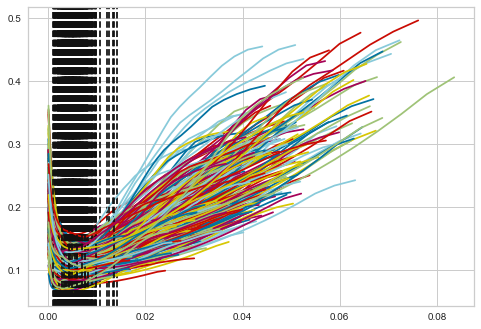

In [10]:
# p = 50, n = 100
Sensitivity0_l = []
Specificity0_l = []
Sensitivity0_ad = []
Specificity0_ad = []
for i in range(500):
    p0 = 50
    n0 = 100
    coeff0, A0, std0, e0, x0, y0, SNR0 = generate_data(p0, n0)
    true_beta0 = np.ravel(coeff0)
    y0 = np.ravel(y0)
    ml0 = LassoCV(cv=10)
    visualizer0 = AlphaSelection(ml0).fit(x0, y0)
    clf0 = linear_model.Lasso(alpha=visualizer0.estimator.alpha_)
    clf0.fit(x0, y0)
    beta_lasso0 = clf0.coef_
    
    mr0 = RidgeCV(alphas=[0.1, 1.0, 10.0]).fit(x0, y0)
    w0 = mr0.coef_
    w0 = np.diag(w0)
    xt0 = x0.dot(w0.transpose())
    clf_ad0 = linear_model.Lasso(alpha=visualizer0.estimator.alpha_)
    clf_ad0.fit(xt0, y0)
    beta_lasso0 = clf_ad0.coef_
    beta_adlasso0 = w0.transpose().dot(beta_lasso0)
    
    l10, l20, l30, l40 = true_lasso(true_beta0, beta_lasso0, p0)
    ad10, ad20, ad30, ad40 = true_adlasso(true_beta0, beta_adlasso0, p0)
    Sens_l = int(l10) / ((int(l10) + int(l30)))
    Sensitivity0_l.append(Sens_l)
    Spec_l = int(l40) / ((int(l40) + int(l20)))
    Specificity0_l.append(Spec_l)
    Sens_ad = int(ad10) / ((int(ad10) + int(ad30)))
    Sensitivity0_ad.append(Sens_ad)
    Spec_ad = int(ad40) / ((int(ad40) + int(ad20)))
    Specificity0_ad.append(Spec_ad)

In [11]:
print("Mean Sensitivity lasso:", statistics.mean(Sensitivity0_l))
print("Mean Specificity lasso:", statistics.mean(Specificity0_l))
print("Mean Sensitivity adaptive lasso:", statistics.mean(Sensitivity0_ad))
print("Mean Specificity adaptive lasso:", statistics.mean(Specificity0_ad))

Mean Sensitivity lasso: 0.5068047619047619
Mean Specificity lasso: 0.9796207139051155
Mean Sensitivity adaptive lasso: 0.5068047619047619
Mean Specificity adaptive lasso: 0.9796207139051155


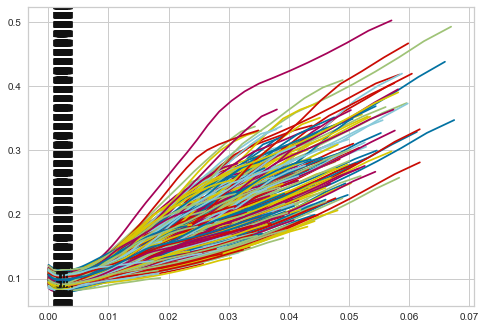

In [12]:
# p = 50, n = 500
Sensitivity1_l = []
Specificity1_l = []
Sensitivity1_ad = []
Specificity1_ad = []
for i in range(500):
    p1 = 50
    n1 = 500
    coeff1, A1, std1, e1, x1, y1, SNR1 = generate_data(p1, n1)
    true_beta1 = np.ravel(coeff1)
    y1 = np.ravel(y1)
    ml1 = LassoCV(cv=10)
    visualizer1 = AlphaSelection(ml1).fit(x1, y1)
    clf1 = linear_model.Lasso(alpha=visualizer1.estimator.alpha_)
    clf1.fit(x1, y1)
    beta_lasso1 = clf1.coef_
    
    mr1 = RidgeCV(alphas=[0.1, 1.0, 10.0]).fit(x1, y1)
    w1 = mr1.coef_
    w1 = np.diag(w1)
    xt1 = x1.dot(w1.transpose())
    clf_ad1 = linear_model.Lasso(alpha=visualizer1.estimator.alpha_)
    clf_ad1.fit(xt1, y1)
    beta_llasso1 = clf_ad1.coef_
    beta_adlasso1 = w1.transpose().dot(beta_llasso1)
    
    l11, l21, l31, l41 = true_lasso(true_beta1, beta_lasso1, p1)
    ad11, ad21, ad31, ad41 = true_adlasso(true_beta1, beta_adlasso1, p1)
    Sens_l = int(l11) / ((int(l11) + int(l31)))
    Sensitivity1_l.append(Sens_l)
    Spec_l = int(l41) / ((int(l41) + int(l21)))
    Specificity1_l.append(Spec_l)
    Sens_ad = int(ad11) / ((int(ad11) + int(ad31)))
    Sensitivity1_ad.append(Sens_ad)
    Spec_ad = int(ad41) / ((int(ad41) + int(ad21)))
    Specificity1_ad.append(Spec_ad)

In [13]:
print("Mean Sensitivity lasso:", statistics.mean(Sensitivity1_l))
print("Mean Specificity lasso:", statistics.mean(Specificity1_l))
print("Mean Sensitivity adaptive lasso:", statistics.mean(Sensitivity1_ad))
print("Mean Specificity adaptive lasso:", statistics.mean(Specificity1_ad))

Mean Sensitivity lasso: 0.8999460317460317
Mean Specificity lasso: 0.7733364132369804
Mean Sensitivity adaptive lasso: 0.7151690476190476
Mean Specificity adaptive lasso: 0.9983713893656605


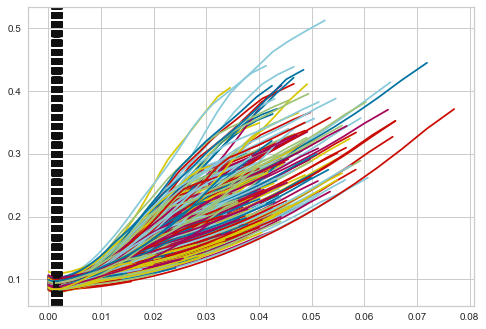

In [14]:
# p = 50, n = 1000
Sensitivity2_l = []
Specificity2_l = []
Sensitivity2_ad = []
Specificity2_ad = []
for i in range(500):
    p2 = 50
    n2 = 1000
    coeff2, A2, std2, e2, x2, y2, SNR2 = generate_data(p2, n2)
    true_beta2 = np.ravel(coeff2)
    y2 = np.ravel(y2)
    ml2 = LassoCV(cv=10)
    visualizer2 = AlphaSelection(ml2).fit(x2, y2)
    clf2 = linear_model.Lasso(alpha=visualizer2.estimator.alpha_)
    clf2.fit(x2, y2)
    beta_lasso2 = clf2.coef_
    
    mr2 = RidgeCV(alphas=[0.1, 1.0, 10.0]).fit(x2, y2)
    w2 = mr2.coef_
    w2 = np.diag(w2)
    xt2 = x2.dot(w2.transpose())
    clf_ad2 = linear_model.Lasso(alpha=visualizer2.estimator.alpha_)
    clf_ad2.fit(xt2, y2)
    beta_llasso2 = clf_ad2.coef_
    beta_adlasso2 = w2.transpose().dot(beta_llasso2)
    
    l12, l22, l32, l42 = true_lasso(true_beta2, beta_lasso2, p2)
    ad12, ad22, ad32, ad42 = true_adlasso(true_beta2, beta_adlasso2, p2)
    
    Sens_l = int(l12) / ((int(l12) + int(l32)))
    Sensitivity2_l.append(Sens_l)
    Spec_l = int(l42) / ((int(l42) + int(l22)))
    Specificity2_l.append(Spec_l)
    Sens_ad = int(ad12) / ((int(ad12) + int(ad32)))
    Sensitivity2_ad.append(Sens_ad)
    Spec_ad = int(ad42) / ((int(ad42) + int(ad22)))
    Specificity2_ad.append(Spec_ad)

In [15]:
print("Mean Sensitivity lasso:", statistics.mean(Sensitivity2_l))
print("Mean Specificity lasso:", statistics.mean(Specificity2_l))
print("Mean Sensitivity adaptive lasso:", statistics.mean(Sensitivity2_ad))
print("Mean Specificity adaptive lasso:", statistics.mean(Specificity2_ad))
print()
print("Sensitivity adaptive lasso:", max(Sensitivity2_ad))

Mean Sensitivity lasso: 0.924188888888889
Mean Specificity lasso: 0.7622834995281393
Mean Sensitivity adaptive lasso: 0.7710960317460317
Mean Specificity adaptive lasso: 0.9997237555033358

Sensitivity adaptive lasso: 1.0


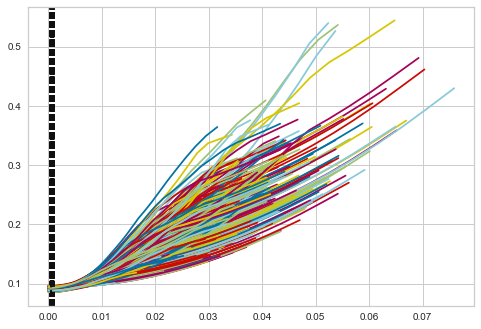

In [16]:
# p = 50, n = 5000
Sensitivity3_l = []
Specificity3_l = []
Sensitivity3_ad = []
Specificity3_ad = []
for i in range(500):
    p3 = 50
    n3 = 5000
    coeff3, A3, std3, e3, x3, y3, SNR3 = generate_data(p3, n3)
    true_beta3 = np.ravel(coeff3)
    
    y3 = np.ravel(y3)
    ml3 = LassoCV(cv=10)
    visualizer3 = AlphaSelection(ml3).fit(x3, y3)
    clf3 = linear_model.Lasso(alpha=visualizer3.estimator.alpha_)
    clf3.fit(x3, y3)
    beta_lasso3 = clf3.coef_
    
    mr3 = RidgeCV(alphas=[0.1, 10, 1]).fit(x3, y3)
    w3 = mr3.coef_
    w3 = np.diag(w3)
    xt3 = x3.dot(w3.transpose())
    clf_ad3 = linear_model.Lasso(alpha=visualizer3.estimator.alpha_)
    clf_ad3.fit(xt3, y3)
    beta_llasso3 = clf_ad3.coef_
    beta_adlasso3 = w3.transpose().dot(beta_llasso3)
    
    l13, l23, l33, l43 = true_lasso(true_beta3, beta_lasso3, p3)
    ad13, ad23, ad33, ad43 = true_adlasso(true_beta3, beta_adlasso3, p3)
    Sens_l = int(l13) / ((int(l13) + int(l33)))
    Sensitivity3_l.append(Sens_l)
    Spec_l = int(l43) / ((int(l43) + int(l23)))
    Specificity3_l.append(Spec_l)
    Sens_ad = int(ad13) / ((int(ad13) + int(ad33)))
    Sensitivity3_ad.append(Sens_ad)
    Spec_ad = int(ad43) / ((int(ad43) + int(ad23)))
    Specificity3_ad.append(Spec_ad)

In [17]:
print("Mean Sensitivity lasso:", statistics.mean(Sensitivity3_l))
print("Mean Specificity lasso:", statistics.mean(Specificity3_l))
print("Mean Sensitivity adaptive lasso:", statistics.mean(Sensitivity3_ad))
print("Mean Specificity adaptive lasso:", statistics.mean(Specificity3_ad))
print()
print("Sensitivity adaptive lasso:", max(Sensitivity3_ad))

Mean Sensitivity lasso: 0.9723952380952381
Mean Specificity lasso: 0.7446957963886495
Mean Sensitivity adaptive lasso: 0.8605015873015873
Mean Specificity adaptive lasso: 1.0

Sensitivity adaptive lasso: 1.0
